In [20]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [21]:
# Loading and reading data
df = pd.read_csv(r'C:\Users\FILI DANI\Downloads\archive (12)\BankChurners.csv')

In [22]:
# Removal of unnecessary columns (last two columns)
df = df.iloc[:,1:21]

In [23]:
# Scaling the numerical variables via Robust scaler
for col in df.columns:
    if df[col].dtype != type(object):
        scaler = RobustScaler()
        df[col] = scaler.fit_transform(df[[col]])

In [24]:
# Handling categorical varibales (encoding)

# Encoding ordinal categorical columns
ordinal_categorical_columns = ['Education_Level','Income_Category','Card_Category']
def encoding_education_level(education_level):
    if education_level == 'Uneducated':
        return 0
    elif education_level == 'Unknown':
        return 1
    elif education_level == 'High School':
        return 2
    elif education_level == 'College':
        return 3
    elif education_level == 'Graduate':
        return 4
    elif education_level == 'Post-Graduate':
        return 5
    elif education_level == 'Doctorate':
        return 6
def encoding_income_category(income_category):
    if income_category == 'Unknown':
        return 0
    elif income_category == 'Less than $40K':
        return 1
    elif income_category == '$40K - $60K':
        return 2
    elif income_category == '$60K - $80K':
        return 3
    elif income_category == '$80K - $120K':
        return 4
    elif income_category == '$120K +':
        return 5
def encoding_card_category(card_category):
    if card_category == 'Blue':
        return 0
    elif card_category == 'Silver':
        return 1
    elif card_category == 'Gold':
        return 2
    elif card_category == 'Platinum':
        return 3
df['Education_Level'] = df['Education_Level'].apply(encoding_education_level)
df['Income_Category'] = df['Income_Category'].apply(encoding_income_category)
df['Card_Category'] = df['Card_Category'].apply(encoding_card_category)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x:1 if x=='Attrited Customer' else 0)

# Label ecoding (nominal categorical columsn)
for col in df.columns:
    if df[col].dtype == type(object):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [25]:
# Splitting the dataset
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# Sequestial Forward Feature Selection for Logistic Regression
sfs_logistic = SFS(estimator=LogisticRegression(),k_features='best',scoring='f1')
sfs_logistic.fit(x_train,y_train)

# Convert tuple best features to array
def convert_to_array(features):
    features_list = []
    for x in features:
        features_list.append(x)
    return features_list

# Store best features 
sfs_logistic_best_features = convert_to_array(sfs_logistic.k_feature_names_)
sfs_logistic_best_score = sfs_logistic.k_score_
print(f'The best features are {sfs_logistic_best_features}')
print(f'The best score is {sfs_logistic_best_score}')

The best features are ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
The best score is 0.660703608339658


In [27]:
# Sequestial Forward Feature Selection for Naive Bayes
sfs_naive_bayes = SFS(estimator=GaussianNB(),k_features='best',scoring='f1')
sfs_naive_bayes.fit(x_train,y_train)

# Store best features
sfs_naive_bayes_best_features = convert_to_array(sfs_naive_bayes.k_feature_names_)
sfs_naive_bayes_best_score = sfs_naive_bayes.k_score_
print(f'The best features are {sfs_naive_bayes_best_features}')
print(f'The best score is {sfs_naive_bayes_best_score}')

The best features are ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
The best score is 0.6776273848768819


In [28]:
# Sequestial Forward Feature Selection for Support Vector Machines
sfs_svm = SFS(estimator=SVC(),k_features='best',scoring='f1')
sfs_svm.fit(x_train,y_train)

# Store best features
sfs_svm_best_features = convert_to_array(sfs_svm.k_feature_names_)
sfs_svm_best_score = sfs_svm.k_score_
print(f'The best features are {sfs_svm_best_features}')
print(f'The best score is {sfs_svm_best_score}')

The best features are ['Customer_Age', 'Gender', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
The best score is 0.8021358230161562


In [29]:
# Sequestial Forward Feature Selection for Decision tree
sfs_decision_tree = SFS(estimator=DecisionTreeClassifier(),k_features='best',scoring='f1')
sfs_decision_tree.fit(x_train,y_train)

# Store best features
sfs_decision_tree_best_features = convert_to_array(sfs_decision_tree.k_feature_names_)
sfs_decision_tree_best_score = sfs_decision_tree.k_score_
print(f'The best features are {sfs_decision_tree_best_features}')
print(f'The best score is {sfs_decision_tree_best_score}')

The best features are ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
The best score is 0.8142639582411114


In [30]:
# Applying Sequestial Forward Feature Selection for K-nearest neighbor to identify best number of neighbors to use
number_of_neighbors = [3,6,9,12,15,18]
sfs_k_nearest_neighbor_scores = []
for neighbor in number_of_neighbors:
    sfs_k_nearest_neighbor = SFS(estimator=KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski',p=2),k_features='best',
                                 scoring='f1')
    sfs_k_nearest_neighbor.fit(x_train,y_train)
    sfs_k_nearest_neighbor_scores.append(sfs_k_nearest_neighbor.k_score_)

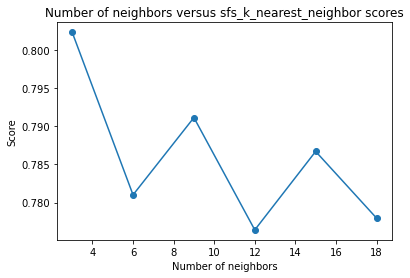

In [31]:
# Identifying best number of neighbors to use for sfs_k_nearest_neighbor
fig , ax = plt.subplots()
ax.plot(number_of_neighbors,sfs_k_nearest_neighbor_scores,linestyle='-',marker='o')
ax.set_title('Number of neighbors versus sfs_k_nearest_neighbor scores')
ax.set_ylabel('Score')
ax.set_xlabel('Number of neighbors')
plt.show()

In [32]:
# Sequestial Forward Feature Selection for K-nearest neighbor
sfs_k_nearest_neighbor = SFS(estimator=KNeighborsClassifier(n_neighbors=3,metric='minkowski',
                                                           p=2),k_features='best',scoring='f1')
sfs_k_nearest_neighbor.fit(x_train,y_train)

# Store best features
sfs_k_nearest_neighbor_best_features = convert_to_array(sfs_k_nearest_neighbor.k_feature_names_)
sfs_k_nearest_neighbor_best_score = sfs_k_nearest_neighbor.k_score_
print(f'The best features are {sfs_k_nearest_neighbor_best_features}')
print(f'The best score is {sfs_k_nearest_neighbor_best_score}')

The best features are ['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct']
The best score is 0.8022874209603226


In [33]:
# Applying Sequestial Forward Feature Selection for random forest to identify best number of estimators to use
number_of_estimators = [10,20,30,40,50,60]
sfs_random_forest_scores = []
for estimator in number_of_estimators:
    sfs_random_forest = SFS(estimator=RandomForestClassifier(n_estimators=estimator,max_depth=3,
                                                             random_state=42),k_features='best',
                                 scoring='f1')
    sfs_random_forest.fit(x_train,y_train)
    sfs_random_forest_scores.append(sfs_random_forest.k_score_)

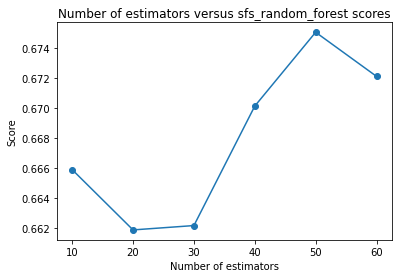

In [34]:
# Identifying best number of neighbors to use for sfs_random_forest
fig , ax = plt.subplots()
ax.plot(number_of_estimators,sfs_random_forest_scores,linestyle='-',marker='o')
ax.set_title('Number of estimators versus sfs_random_forest scores')
ax.set_ylabel('Score')
ax.set_xlabel('Number of estimators')
plt.show()

In [35]:
# Sequestial Forward Feature Selection for Random forest
sfs_random_forest = SFS(estimator=RandomForestClassifier(n_estimators=50,max_depth=3,
                                                             random_state=42),k_features='best',scoring='f1')
sfs_random_forest.fit(x_train,y_train)

# Store best features
sfs_random_forest_best_features = convert_to_array(sfs_random_forest.k_feature_names_)
sfs_random_forest_best_score = sfs_random_forest.k_score_
print(f'The best features are {sfs_random_forest_best_features}')
print(f'The best score is {sfs_random_forest_best_score}')

The best features are ['Gender', 'Income_Category', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
The best score is 0.6750587117796905


In [36]:
# Applying Sequestial Forward Feature Selection for Gradient boosting to identify best number of estimators to use
number_of_estimators = [10,20,30,40,50,60]
sfs_gradient_boosting_scores = []
for estimator in number_of_estimators:
    sfs_gradient_boosting = SFS(estimator=GradientBoostingClassifier(n_estimators=estimator,max_depth=3,
                                                             random_state=42),k_features='best',
                                 scoring='f1')
    sfs_gradient_boosting.fit(x_train,y_train)
    sfs_gradient_boosting_scores.append(sfs_gradient_boosting.k_score_)

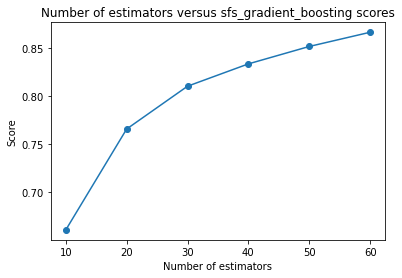

In [37]:
# Identifying best number of neighbors to use for sfs_gradient_boosting
fig , ax = plt.subplots()
ax.plot(number_of_estimators,sfs_gradient_boosting_scores,linestyle='-',marker='o')
ax.set_title('Number of estimators versus sfs_gradient_boosting scores')
ax.set_ylabel('Score')
ax.set_xlabel('Number of estimators')
plt.show()

In [38]:
# Sequestial Forward Feature Selection for Gradient Boosting
sfs_gradient_boosting = SFS(estimator=GradientBoostingClassifier(n_estimators=60,max_depth=3,
                                                             random_state=42),k_features='best',scoring='f1')
sfs_gradient_boosting.fit(x_train,y_train)

# Store best features
sfs_gradient_boosting_best_features = convert_to_array(sfs_gradient_boosting.k_feature_names_)
sfs_gradient_boosting_best_score = sfs_gradient_boosting.k_score_
print(f'The best features are {sfs_gradient_boosting_best_features}')
print(f'The best score is {sfs_gradient_boosting_best_score}')

The best features are ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
The best score is 0.8666343238498616
